<a href="https://colab.research.google.com/github/bhargav23/CNN-Projects/blob/master/VGG/Fashion_Mnist_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
!git clone https://github.com/bhargav23/CNN-Projects

Cloning into 'CNN-Projects'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 145 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (145/145), 786.21 KiB | 853.00 KiB/s, done.
Resolving deltas: 100% (75/75), done.


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
import sys
sys.path.append('/content/CNN-Projects/Libraries')

In [5]:
import evadataloader
dataloader = evadataloader.DataLoader()


# Train Phase transformations
train_transforms = transforms.Compose([
                                        transforms.Resize((28, 28)),
                                        #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values. 
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                        transforms.Resize((28, 28)),
                                        #transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])



trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=train_transforms)
trainloader = dataloader.load(trainset)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=test_transforms)
testloader = dataloader.load(testset)

classes = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw




Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


torch.Size([512, 1, 28, 28])
torch.Size([512])


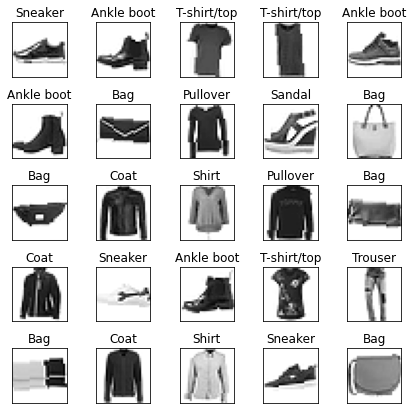

In [6]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline
def show25(images, labels):
  r, c = 5, 5
  figmatrix = plt.figure(figsize=(7, 7))
  gs1 = gridspec.GridSpec(r, c)
  gs1.update(wspace=0.5, hspace=0.5) # set the 
  for i in range(1, r*c+1):
    plt.subplot(gs1[i-1])
    plt.tick_params( axis='both', which='both', labelbottom=False, labelleft=False, left=False, bottom=False)
    plt.imshow(images[i-1].numpy().squeeze(), cmap='gray_r')
    plt.title(classes[labels[i-1]])
  plt.show()

show25(images[:25], labels[:25])

In [7]:
import vggnet
net = vggnet.VGG('VGG16')

In [8]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = net.to(device)
summary(model, input_size=(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 28, 28]             640
       BatchNorm2d-2           [-1, 64, 28, 28]             128
              ReLU-3           [-1, 64, 28, 28]               0
            Conv2d-4           [-1, 64, 28, 28]          36,928
       BatchNorm2d-5           [-1, 64, 28, 28]             128
              ReLU-6           [-1, 64, 28, 28]               0
         MaxPool2d-7           [-1, 64, 14, 14]               0
            Conv2d-8          [-1, 128, 14, 14]          73,856
       BatchNorm2d-9          [-1, 128, 14, 14]             256
             ReLU-10          [-1, 128, 14, 14]               0
           Conv2d-11          [-1, 128, 14, 14]         147,584
      BatchNorm2d-12          [-1, 128, 14, 14]             256
             ReLU-13          [-1, 128, 14, 14]               0
        MaxPool2d-14            [-

In [10]:
import evascheduler

In [11]:
from torch.optim.lr_scheduler import StepLR
from evascheduler import train,test

model =  net.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)

  0%|          | 0/118 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.26210176944732666 Batch_id=117 Accuracy=82.95: 100%|██████████| 118/118 [00:21<00:00,  5.42it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1182, Accuracy: 8818/10000 (88.18%)

EPOCH: 1


Loss=0.22792188823223114 Batch_id=117 Accuracy=90.40: 100%|██████████| 118/118 [00:21<00:00,  5.39it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.1093, Accuracy: 8907/10000 (89.07%)

EPOCH: 2


Loss=0.1574152559041977 Batch_id=117 Accuracy=91.91: 100%|██████████| 118/118 [00:21<00:00,  5.39it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0872, Accuracy: 9128/10000 (91.28%)

EPOCH: 3


Loss=0.26254770159721375 Batch_id=117 Accuracy=92.94: 100%|██████████| 118/118 [00:22<00:00,  5.34it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0999, Accuracy: 9001/10000 (90.01%)

EPOCH: 4


Loss=0.18322835862636566 Batch_id=117 Accuracy=93.73: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0941, Accuracy: 9059/10000 (90.59%)

EPOCH: 5


Loss=0.20105819404125214 Batch_id=117 Accuracy=94.42: 100%|██████████| 118/118 [00:22<00:00,  5.32it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0818, Accuracy: 9182/10000 (91.82%)

EPOCH: 6


Loss=0.14144295454025269 Batch_id=117 Accuracy=96.22: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0661, Accuracy: 9339/10000 (93.39%)

EPOCH: 7


Loss=0.03179606422781944 Batch_id=117 Accuracy=96.83: 100%|██████████| 118/118 [00:22<00:00,  5.28it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0649, Accuracy: 9351/10000 (93.51%)

EPOCH: 8


Loss=0.06384829431772232 Batch_id=117 Accuracy=97.23: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0651, Accuracy: 9349/10000 (93.49%)

EPOCH: 9


Loss=0.049252644181251526 Batch_id=117 Accuracy=97.47: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0649, Accuracy: 9351/10000 (93.51%)

EPOCH: 10


Loss=0.07901141792535782 Batch_id=117 Accuracy=97.69: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0662, Accuracy: 9338/10000 (93.38%)

EPOCH: 11


Loss=0.0752437636256218 Batch_id=117 Accuracy=97.88: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0626, Accuracy: 9374/10000 (93.74%)

EPOCH: 12


Loss=0.05343100056052208 Batch_id=117 Accuracy=98.14: 100%|██████████| 118/118 [00:22<00:00,  5.28it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0628, Accuracy: 9372/10000 (93.72%)

EPOCH: 13


Loss=0.015003164298832417 Batch_id=117 Accuracy=98.28: 100%|██████████| 118/118 [00:22<00:00,  5.28it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0627, Accuracy: 9373/10000 (93.73%)

EPOCH: 14


Loss=0.09783053398132324 Batch_id=117 Accuracy=98.33: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0633, Accuracy: 9367/10000 (93.67%)

EPOCH: 15


Loss=0.0635761171579361 Batch_id=117 Accuracy=98.34: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0629, Accuracy: 9371/10000 (93.71%)

EPOCH: 16


Loss=0.1857287734746933 Batch_id=117 Accuracy=98.40: 100%|██████████| 118/118 [00:22<00:00,  5.29it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0633, Accuracy: 9367/10000 (93.67%)

EPOCH: 17


Loss=0.04118536785244942 Batch_id=117 Accuracy=98.43: 100%|██████████| 118/118 [00:22<00:00,  5.28it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0629, Accuracy: 9371/10000 (93.71%)

EPOCH: 18


Loss=0.04316280409693718 Batch_id=117 Accuracy=98.41: 100%|██████████| 118/118 [00:22<00:00,  5.30it/s]
  0%|          | 0/118 [00:00<?, ?it/s]


Test set: Average loss: 0.0625, Accuracy: 9375/10000 (93.75%)

EPOCH: 19


Loss=0.07353019714355469 Batch_id=117 Accuracy=98.42: 100%|██████████| 118/118 [00:22<00:00,  5.26it/s]



Test set: Average loss: 0.0631, Accuracy: 9369/10000 (93.69%)



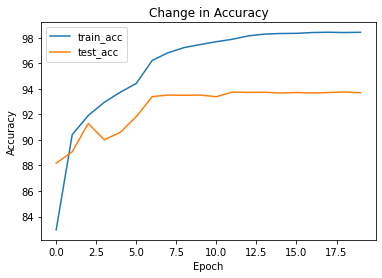

In [12]:
from evascheduler import draw_graph
draw_graph()

In [13]:
from evascheduler import get_misclassified
misclassified = get_misclassified()

In [14]:
def plot_images(img_data,classes,img_name):
  figure = plt.figure(figsize=(10, 10))
  
  num_of_images = len(img_data)
  for index in range(1, num_of_images + 1):
      img = img_data[index-1][0][0]
      plt.subplot(5, 5, index)
      plt.axis('off')
      plt.imshow(img.cpu().numpy(),cmap='gray_r')
      plt.title("Actual: %s\nPredicted: %s" % (classes[img_data[index-1][1]], classes[img_data[index-1][2]]))
  
  plt.tight_layout()
  plt.savefig(img_name)


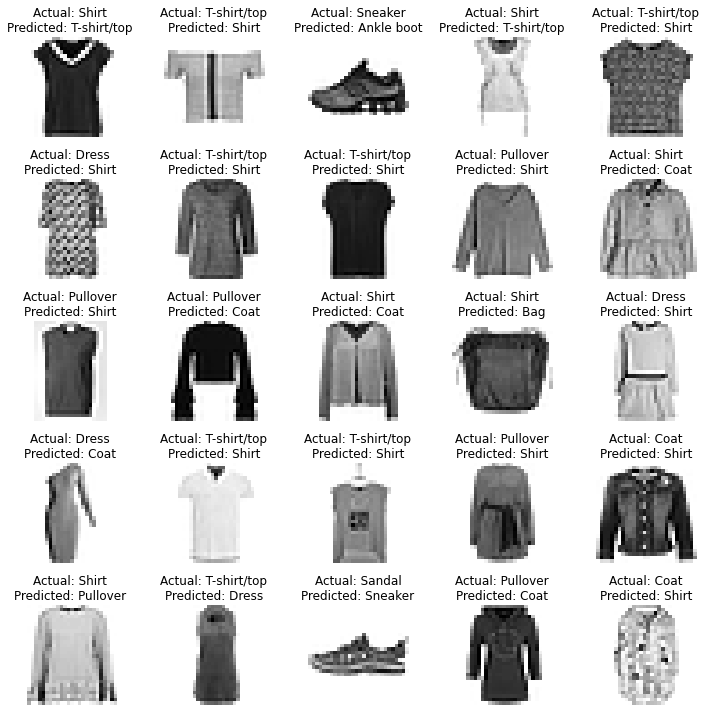

In [15]:
#import utils
#from utils import plot_images
plot_images(misclassified,classes,"misclassified.png")